In [1]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Specify column names
columns = ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']

# Read CSV file, skipping problematic lines
df_har = pd.read_csv('WISDM_ar_v1.1_raw.txt', header=None, names=columns, error_bad_lines=False)


Skipping line 134634: expected 6 fields, saw 11
Skipping line 197687: expected 6 fields, saw 11

Skipping line 273261: expected 6 fields, saw 11
Skipping line 371932: expected 6 fields, saw 11

Skipping line 711484: expected 6 fields, saw 11

Skipping line 832903: expected 6 fields, saw 7
Skipping line 832904: expected 6 fields, saw 7
Skipping line 832905: expected 6 fields, saw 7
Skipping line 832906: expected 6 fields, saw 7
Skipping line 832907: expected 6 fields, saw 7
Skipping line 832908: expected 6 fields, saw 7
Skipping line 832909: expected 6 fields, saw 7
Skipping line 832910: expected 6 fields, saw 7
Skipping line 832911: expected 6 fields, saw 7
Skipping line 832912: expected 6 fields, saw 7
Skipping line 832913: expected 6 fields, saw 7
Skipping line 832914: expected 6 fields, saw 7
Skipping line 832915: expected 6 fields, saw 7
Skipping line 832916: expected 6 fields, saw 7
Skipping line 832917: expected 6 fields, saw 7
Skipping line 832918: expected 6 fields, saw 7
Skipp

In [3]:
# removing null values
df_har = df_har.dropna()
df_har.shape

(1086465, 6)

In [4]:
# transforming the z-axis to float
df_har['z-axis'] = df_har['z-axis'].str.replace(';', '')
df_har['z-axis'] = df_har['z-axis'].apply(lambda x:float(x))

In [5]:
# drop rows where timestamp is 0
df = df_har[df_har['timestamp'] != 0]

In [6]:
# arrange data in ascending order of user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)

In [7]:
df.shape

(1073623, 6)

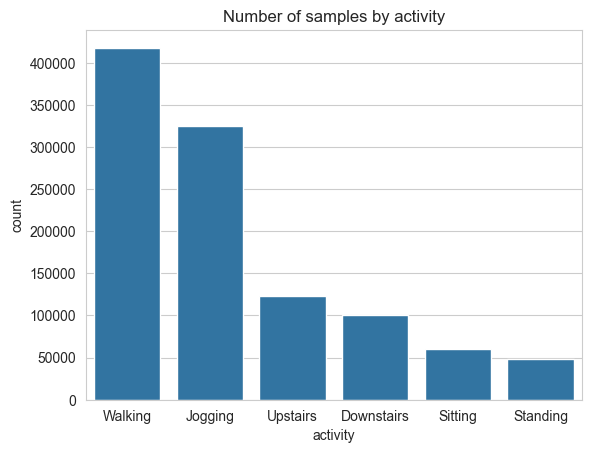

In [8]:
sns.set_style("whitegrid")
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()

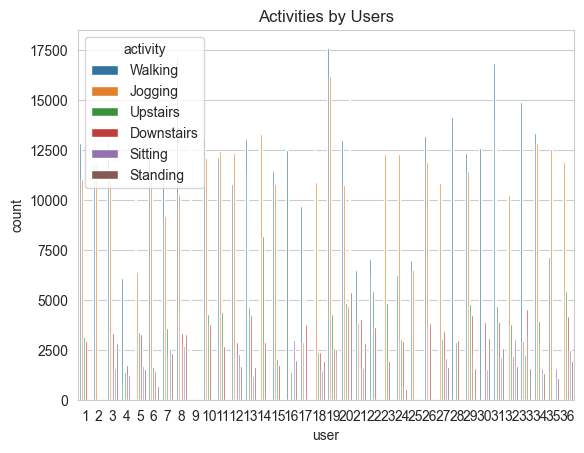

In [9]:
sns.countplot(x = 'user',  hue = 'activity', data = df)
plt.title('Activities by Users')
plt.show()

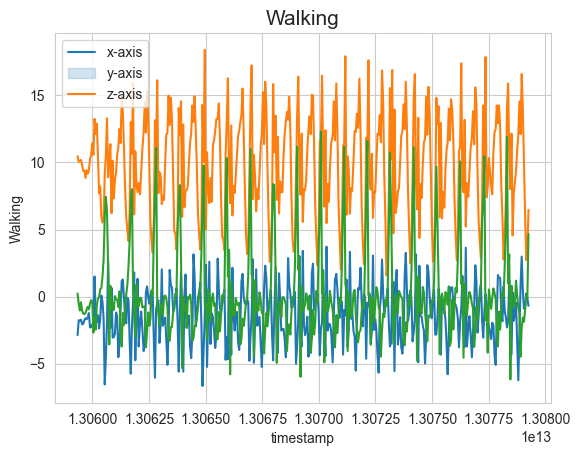

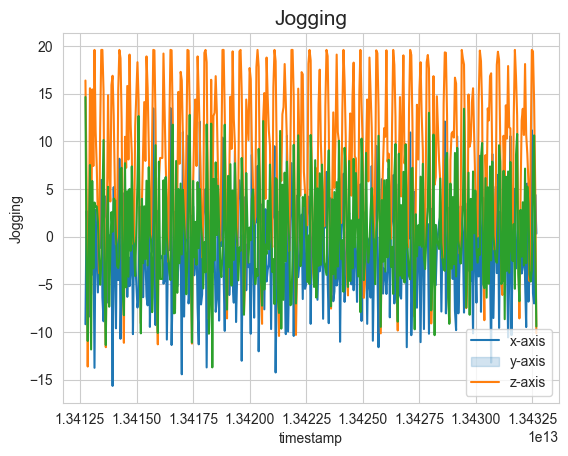

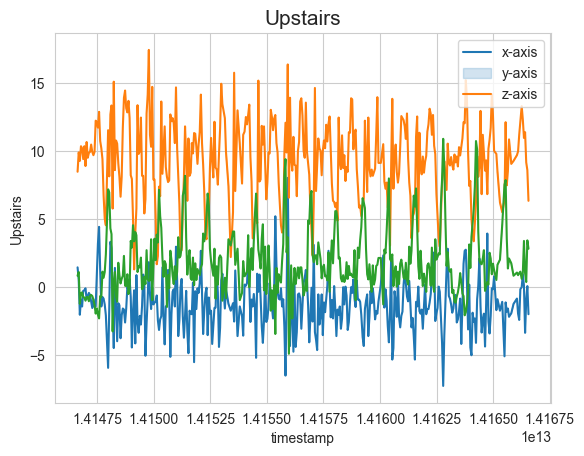

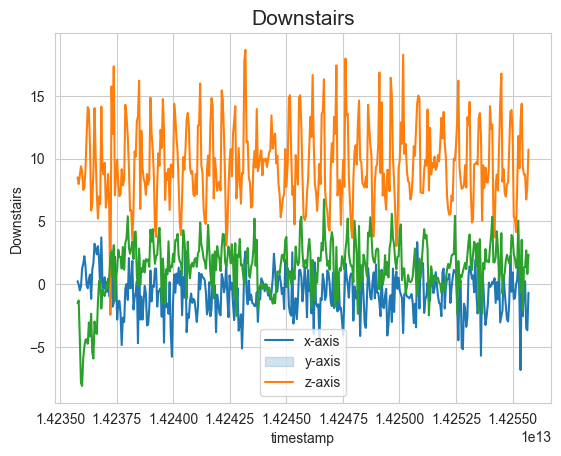

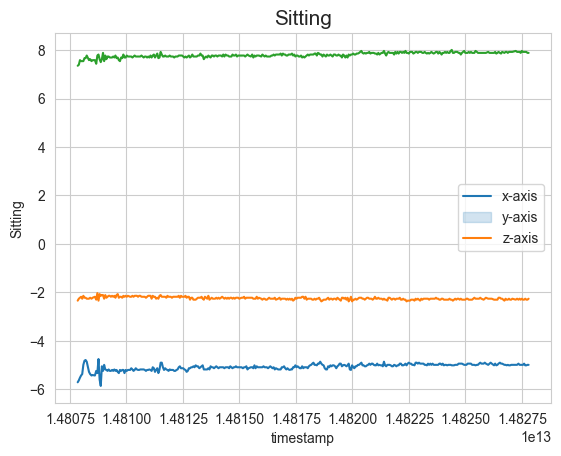

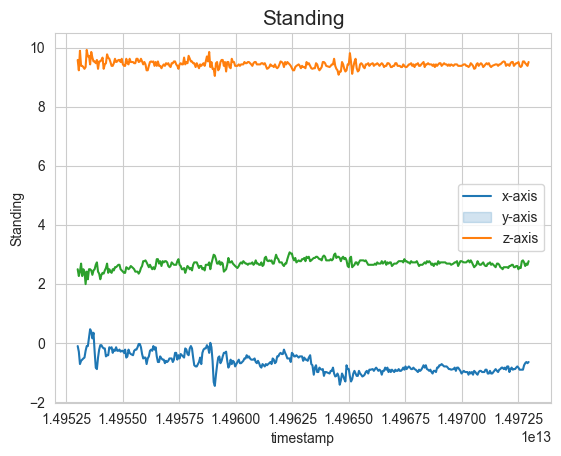

In [10]:
activities = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
for i in activities:
    data36 = df[(df['user'] == 36) & (df['activity'] == i)][:400]
    sns.lineplot(y = 'x-axis', x = 'timestamp', data = data36)
    sns.lineplot(y = 'y-axis', x = 'timestamp', data = data36)
    sns.lineplot(y = 'z-axis', x = 'timestamp', data = data36)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

In [11]:
from scipy import stats

random_seed = 42   
n_time_steps = 50 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 5       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015
segments = []
labels = []

for i in range(0,  df.shape[0]- n_time_steps, step):  

    xs = df['x-axis'].values[i: i + 50]

    ys = df['y-axis'].values[i: i + 50]

    zs = df['z-axis'].values[i: i + 50]

    label = stats.mode(df['activity'][i: i + 50])[0][0]

    segments.append([xs, ys, zs])

    labels.append(label)

#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [12]:
reshaped_segments.shape

(107358, 50, 3)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 76,230
Trainable params: 76,230
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)


Epoch 1/5
68/68 [==============================] - 62s 844ms/step - loss: 0.9052 - accuracy: 0.6801 - val_loss: 0.5808 - val_accuracy: 0.7959
Epoch 2/5
68/68 [==============================] - 52s 763ms/step - loss: 0.5209 - accuracy: 0.8153 - val_loss: 0.4587 - val_accuracy: 0.8271
Epoch 3/5
68/68 [==============================] - 58s 864ms/step - loss: 0.4536 - accuracy: 0.8346 - val_loss: 0.4180 - val_accuracy: 0.8381
Epoch 4/5
68/68 [==============================] - 53s 772ms/step - loss: 0.4121 - accuracy: 0.8459 - val_loss: 0.3908 - val_accuracy: 0.8524
Epoch 5/5
68/68 [==============================] - 3121s 47s/step - loss: 0.3773 - accuracy: 0.8559 - val_loss: 0.3789 - val_accuracy: 0.8538


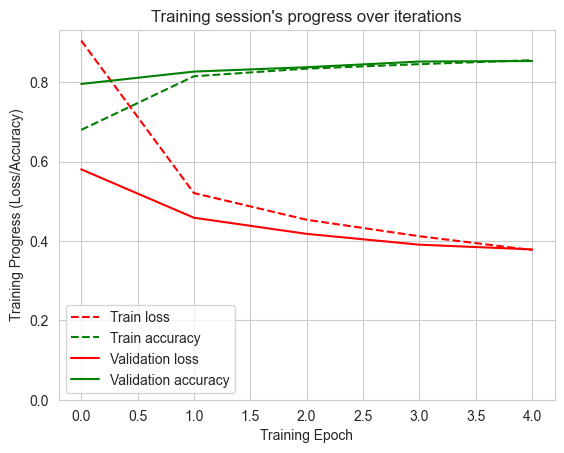

In [17]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

21/21 [==============================] - 4s 200ms/step - loss: 0.3734 - accuracy: 0.8566
Test Accuracy : 0.8566039204597473
Test Loss : 0.3733861744403839


671/671 [==============================] - 20s 30ms/step


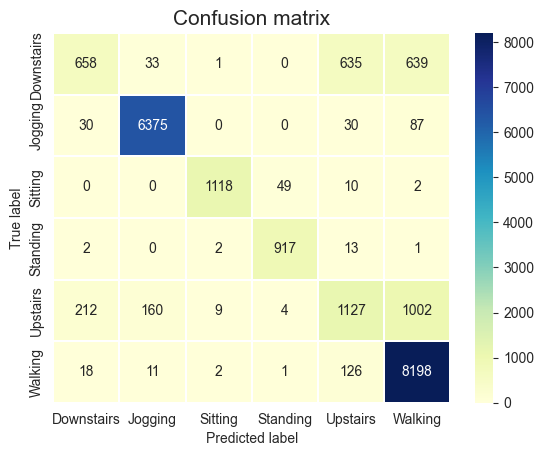

In [20]:
from sklearn import metrics

predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()